In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 
# %matplotlib notebook

import ipysh

%aimport models.base

import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport Dataset_QSH
%aimport models.AEFIT5
%aimport models.Compose
%aimport models.GAN3

import livelossplot.keras
class PlotLossesCallback(livelossplot.keras.PlotLossesCallback):
    def on_train_batch_begin(self, a, b): pass
    def on_train_batch_end(self, a, b): pass
    def on_test_begin(self, a): pass
    def on_test_end(self, a): pass
    def on_test_batch_begin(self, a, b): pass
    def on_test_batch_end(self, a, b): pass

    
class PlotRelevanceCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_size_inches(13, 3)
        w = self.model.layers[0].weights
        ax1.bar(range(0,4), w[0][0:4])
        labels = ['Ip','NS','Vt','F']
        plt.sca(ax1)
        plt.xticks(range(0,4), labels, fontsize=10)
        ax2.bar(range(7,17), w[0][4:14])
        plt.sca(ax2)
        plt.xticks(range(7,17), fontsize=10)        
        ax3.bar(range(7,17), w[0][14:24])
        plt.sca(ax3)
        plt.xticks(range(7,17), fontsize=10)       


# ipysh.Bootstrap_support.debug()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Hunch models imported
reload set for module  Hunch_utils
reload set for module  Dummy_g1data
reload set for module  Hunch_lsplot
reload set for module  Hunch_tSNEplot


Using TensorFlow backend.


# TEST QSH


In [2]:
qsh = Dataset_QSH.Dataset_QSH()
import os
#file = ipysh.abs_builddir+'/te_db_r15_clean_shuffle.npy'
file = ipysh.abs_builddir+'/te_db_r15u_shuffle.npy'
try: qsh.load(file)
except: raise FileNotFoundError

# qsh.shuffle()
qsh.dim = None
qsh.set_null(np.nan)
qsh.set_normal_positive(['prel','te','tbordo','tcentro', 'Ip','NS','VT','F','absBr_rm','argBr_rm','absBr_rs','argBr_rs']) 
print("QSH rebalanced 15 points size: ", len(qsh))


QSH rebalanced 15 points size:  47567


In [3]:
def _map(xy,p,Br):
    pBr = tf.concat([p,Br], axis=0)
    return pBr,xy

ds = qsh.tf_tuple_compose(['prel~te:15','Ip~NS~VT~F','absBr_rm~argBr_rm~absBr_rs~argBr_rs']).map(lambda x,y,br: _map(x,y,br) )
[x for x in ds.shuffle(100).batch(1).take(1)][0]

W0927 17:16:38.217025 140055075534656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:505: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


(<tf.Tensor: id=56, shape=(1, 44), dtype=float32, numpy=
 array([[9.3165940e-01, 8.9363575e-01, 9.3114561e-01, 7.0414597e-01,
         1.8370977e-01, 2.8496843e-02, 6.7903213e-02, 5.8738213e-02,
         4.6020046e-02, 2.4432838e-02, 2.4307923e-02, 1.2103767e-02,
         9.5191430e-03, 1.8633226e-02, 2.9974955e-01, 7.7304222e-02,
         2.9086891e-01, 2.7332836e-01, 4.2640013e-01, 6.3166332e-01,
         6.6617906e-01, 7.4339128e-01, 7.7771269e-02, 3.7056971e-01,
         1.7374190e-02, 1.2479848e-03, 1.8011819e-03, 1.7266255e-03,
         1.4413283e-03, 1.3423071e-03, 9.7708451e-04, 6.9113815e-04,
         9.1768836e-04, 7.6547329e-04, 3.6217135e-01, 1.4720990e-01,
         2.6036879e-01, 2.5942072e-01, 3.9828858e-01, 5.3978676e-01,
         6.8401420e-01, 8.6837679e-01, 8.0276206e-02, 2.7136293e-01]],
       dtype=float32)>, <tf.Tensor: id=57, shape=(1, 30), dtype=float32, numpy=
 array([[0.02827343, 0.10277789, 0.15121816, 0.20828514, 0.27427357,
         0.3485927 , 0.42948723, 

In [4]:
vae = models.AEFIT5.AEFIT5(latent_dim=6, feature_dim=30, dprate=0.1, beta=0., scale=2, geometry=[20,20,10,10])
# vae.build(input_shape=vae.inference_net.input_shape)
vae.compile( vae.optimizer, tf.losses.mse )


AEFIT5 a ready:


In [5]:
dds = ds.map(lambda p,xy: (xy,xy))
vae_history = vae.fit( dds.skip(5000).batch(100, drop_remainder=True), validation_data=dds.take(5000).batch(100), epochs=50)

Epoch 1/50
425/425 [==============================] - 31s 72ms/step - loss: 0.0030 - val_loss: 0.0000e+00
Epoch 2/50
425/425 [==============================] - 28s 65ms/step - loss: 6.0565e-04 - val_loss: 3.4954e-04
Epoch 3/50
425/425 [==============================] - 28s 66ms/step - loss: 5.0708e-04 - val_loss: 3.9484e-04
Epoch 4/50
425/425 [==============================] - 29s 68ms/step - loss: 4.5515e-04 - val_loss: 3.3270e-04
Epoch 5/50
425/425 [==============================] - 28s 66ms/step - loss: 4.2084e-04 - val_loss: 2.2721e-04
Epoch 6/50
425/425 [==============================] - 28s 66ms/step - loss: 3.2695e-04 - val_loss: 1.8849e-04
Epoch 7/50
425/425 [==============================] - 28s 67ms/step - loss: 2.9668e-04 - val_loss: 1.9652e-04
Epoch 8/50
425/425 [==============================] - 28s 67ms/step - loss: 2.8214e-04 - val_loss: 1.9511e-04
Epoch 9/50
425/425 [==============================] - 28s 67ms/step - loss: 2.7387e-04 - val_loss: 1.9022e-04
Epoch 10/50
42

KeyboardInterrupt: 

In [582]:
vae.save('step12_vae_ls_tesi')
# vae.load('step12_vae_ls')
# plt.figure('vae_history')
# plt.plot(vae_history.history['loss'])
# plt.plot(vae_history.history['val_loss'])

In [7]:
vae1 = models.AEFIT5.AEFIT5(latent_dim=3, feature_dim=44, dprate=0.1, scale=2, geometry=[20,20,10,10])
vae1.generative_net.trainable = False
gen = vae1.inference_net

AEFIT5 a ready:


In [8]:
Dds = ds.map(lambda p,xy: (p, tf.reshape(vae.encode(tf.reshape(xy,[1,-1]),training=False)[0],[-1])) )
[x for x in Dds.batch(1).take(1)][0]

(<tf.Tensor: id=58185, shape=(1, 44), dtype=float32, numpy=
 array([[2.5542352e-01, 8.9690715e-01, 5.0007248e-01, 7.2894037e-01,
         6.2978971e-01, 1.3129853e-02, 3.2437105e-02, 5.3593576e-02,
         1.7163994e-02, 9.9094072e-03, 4.0079299e-02, 3.9919499e-02,
         6.2902682e-02, 4.1260205e-02, 6.0444921e-01, 1.7872889e-01,
         6.8886298e-01, 4.1696021e-01, 5.6917697e-01, 5.5776334e-01,
         5.1906776e-01, 5.1577735e-01, 5.8486861e-01, 5.5305690e-01,
         5.8835754e-03, 1.1183927e-03, 7.1040657e-04, 8.5604930e-04,
         6.4980146e-04, 5.7719578e-04, 4.5439979e-04, 4.6208705e-04,
         2.6239958e-04, 3.0197148e-04, 5.1216382e-01, 1.6544084e-01,
         5.0103313e-01, 4.6062762e-01, 5.5462199e-01, 5.9893197e-01,
         6.2579316e-01, 6.5264630e-01, 6.7867243e-01, 7.0564783e-01]],
       dtype=float32)>,
 <tf.Tensor: id=58186, shape=(1, 6), dtype=float32, numpy=
 array([[-1.7226157 ,  0.08701155, -0.5887357 ,  0.67033434,  0.40336818,
         -0.20947173]]

In [9]:
# TRAIN MODEL
rel = gen.layers[0]
rel.rate = 0.
gen.compile( tf.optimizers.Adam(1e-3), tf.losses.mse )

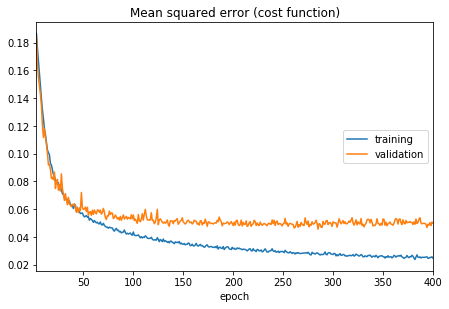

Mean squared error (cost function):
training   (min:    0.024, max:    0.244, cur:    0.025)
validation (min:    0.046, max:    0.228, cur:    0.050)
446/446 [==============================] - 94s 210ms/step - loss: 0.0247 - val_loss: 0.0499


In [10]:
fit = lambda: gen.fit( Dds.skip(3000).batch(100), validation_data=Dds.take(3000).batch(100), epochs=400,
                      callbacks=[PlotLossesCallback()], shuffle=False )
models.base.fn_thread(gen, fit).control_panel()

In [ ]:
# TODO:
# save this image as:  STEP12_7_pBr2SXR_rm-rs_absarg_training_mse.png

In [11]:
gen.layers[1].weights

[<tf.Variable 'aefi_t5_1_iRlv/kernel:0' shape=(44,) dtype=float32, numpy=
 array([0.28338608, 0.27287817, 0.23104154, 0.2669734 , 0.2951481 ,
        0.32762593, 0.32299468, 0.2546166 , 0.22253022, 0.22671722,
        0.22859623, 0.28777438, 0.22935535, 0.28091353, 0.17715193,
        0.11575196, 0.06460966, 0.12882496, 0.07639097, 0.0931503 ,
        0.12543885, 0.12955248, 0.07355169, 0.1214182 , 0.497189  ,
        0.5309437 , 0.71650845, 0.86001945, 0.8834663 , 0.9999999 ,
        0.96893775, 0.8462665 , 0.83015746, 0.92126924, 0.15732168,
        0.09567183, 0.10990736, 0.0869895 , 0.09177601, 0.10577087,
        0.09025083, 0.08971001, 0.10683921, 0.0837365 ], dtype=float32)>]

392/446 [=========================>....] - ETA: 11s - loss: 0.1012

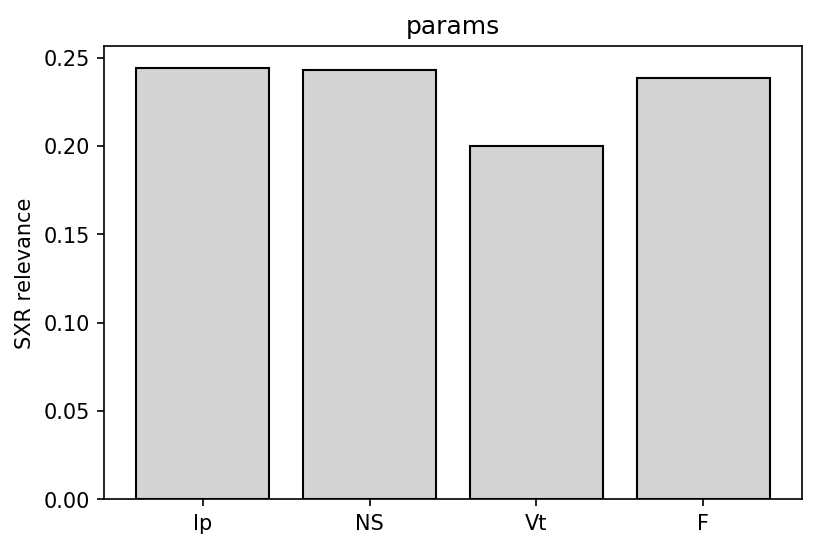

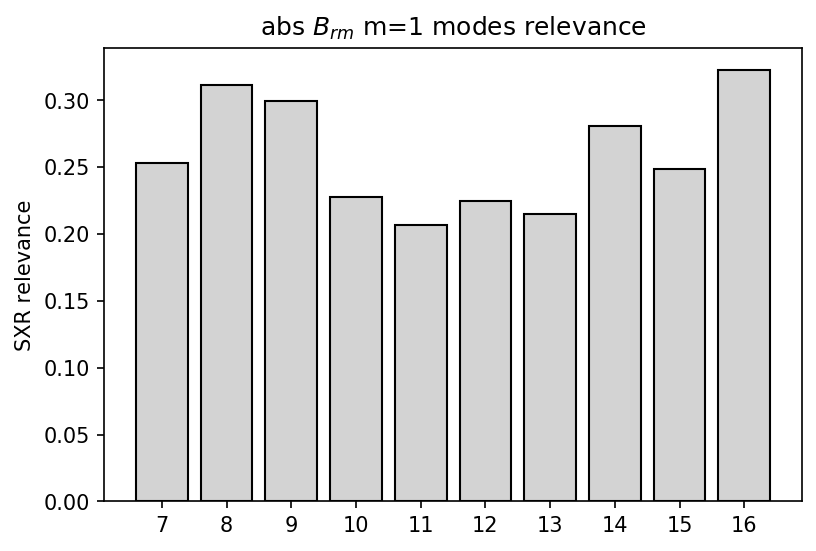

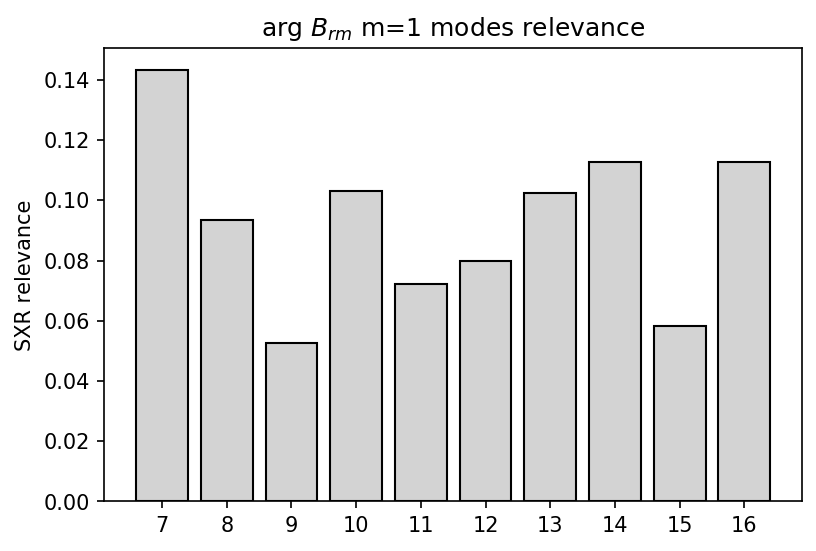

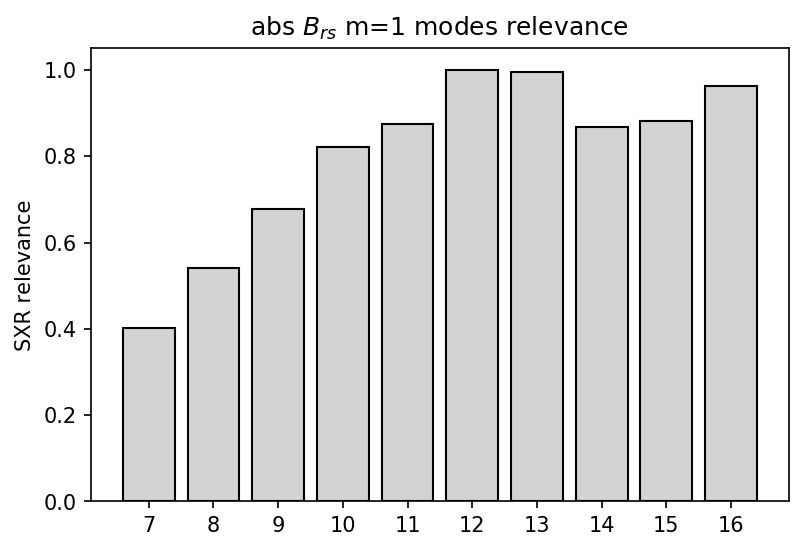

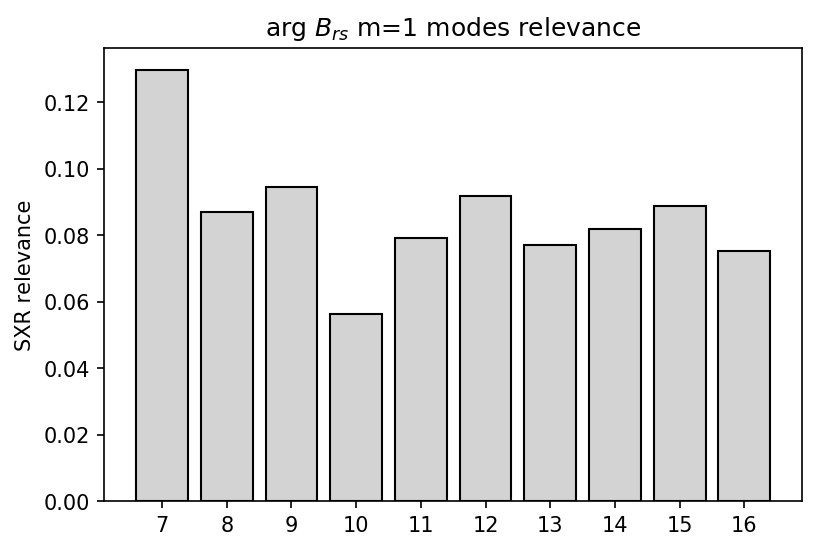

 77/446 [====>.........................] - ETA: 1:42 - loss: 0.0758

In [341]:
index = qsh[0].n
w = gen.layers[1].weights
%matplotlib inline

def plot_bar_x(index, w, title, w2=None):
    # this is for plotting purpose
    fig = plt.figure(title)
    fig.set_dpi(150)
    plt.bar(index, w, color='lightgrey', edgecolor='black')    
    plt.ylabel('SXR relevance', fontsize=10)
    plt.xticks(index, fontsize=10)
    plt.title(title)
    plt.show()

p,abs_Brm,arg_Brm,abs_Brs,arg_Brs = w[0][0:4],w[0][4:14], w[0][14:24], w[0][24:34], w[0][34:44]
plot_bar_x(['Ip','NS','Vt','F'], p, 'params')
plot_bar_x(index, abs_Brm, 'abs $B_{rm}$ m=1 modes relevance')
plot_bar_x(index, arg_Brm, 'arg $B_{rm}$ m=1 modes relevance')
plot_bar_x(index, abs_Brs, 'abs $B_{rs}$ m=1 modes relevance')
plot_bar_x(index, arg_Brs, 'arg $B_{rs}$ m=1 modes relevance')


In [583]:
vae1.save('step12_7_thesis')
# vae1.load('step12.7_p2ls_BrmBrs_abs-arg')

In [342]:
pos = 0

266


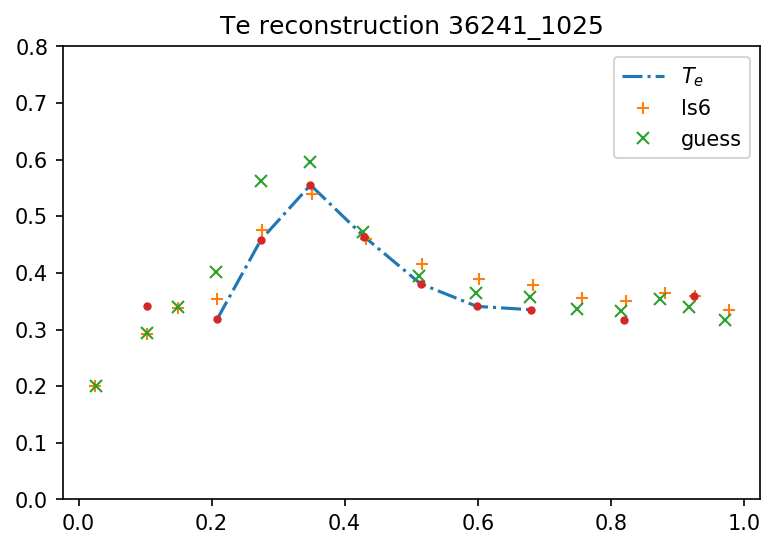

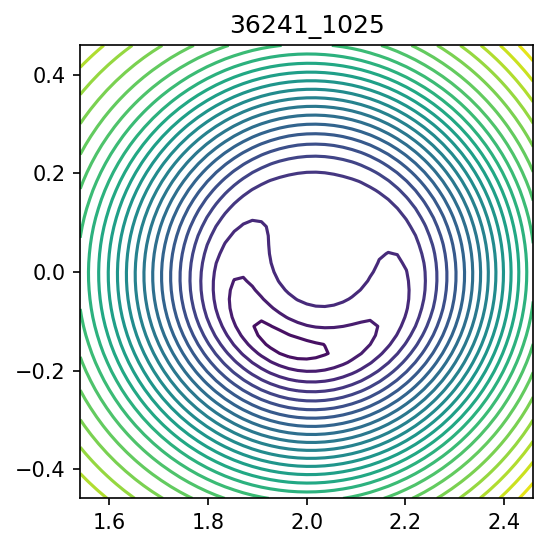

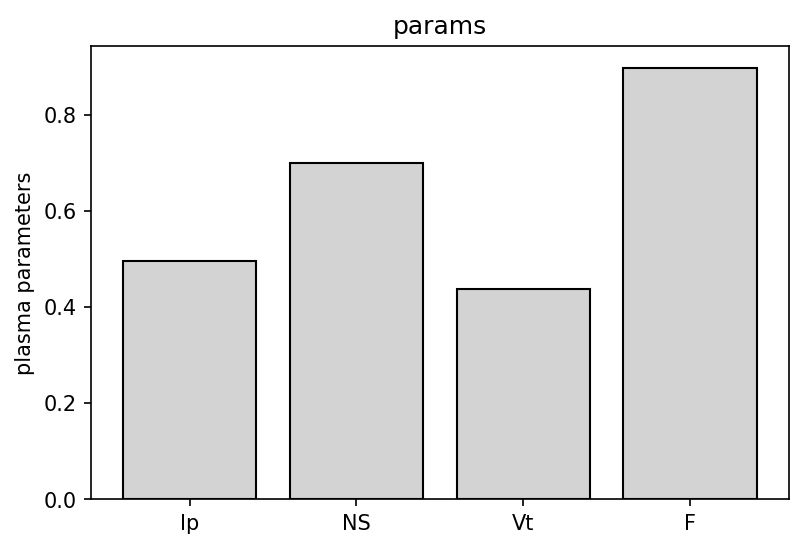

In [611]:
print(pos)

d_pos = [x for x in ds.skip(pos).batch(1).take(1)][0]
path = '/home/andrea/Documents/phd/Thesis/img/STEP12/STEP12_7'


def plot_tf(xy, name=None, h='.'):
    fig = plt.figure('plot')    
    fig.set_dpi(150)
    ax = plt.gca()    
    ax.set_ylim(0.,0.8)
    xy = tf.reshape(xy, [-1])
    x,y = tf.split(xy, num_or_size_splits=2, axis=0)
    plt.plot(x,y,h, label=name)
    ax.legend()

def plot(x,y, name=None, h='.'):  
    fig = plt.figure('plot')    
    fig.set_dpi(150)
    ax = plt.gca()    
    ax.set_ylim(0.,0.8)
    plt.plot(x,y, h, label=name)
    #ax.legend()
    
def plot_bar_x(index, w, title, w2=None):
    # this is for plotting purpose
    fig = plt.figure(title)
    fig.set_dpi(150)
    plt.bar(index, w, color='lightgrey', edgecolor='black')    
    plt.ylabel('plasma parameters', fontsize=10)
    plt.xticks(index, fontsize=10)
    plt.title(title)
    return fig
    

p  = d_pos[0]
xy = d_pos[1]

fig = plt.figure('plot')
# plt.text(0.05,0.7, '$I_p = %.2f$'%qsh[pos]['Ip'] )
ax = plt.gca()
ax.set_title( 'Te reconstruction '+qsh[pos].label.decode("utf-8") )

XY_vae = vae(xy, training=False)
ls = gen(d_pos[0], training=False)
XY = vae.decode(ls, training=False)
# XY = tf.sigmoid(XY)
plot_tf(xy, '$T_e$','-.')
plot_tf(XY_vae, 'ls6','+')
plot_tf(XY, 'guess','x')
plot(qsh[pos]['prel'],qsh[pos]['te'], '$T_c$')

fig2 = plt.figure('contour')
ax2  = plt.gca()
fig2.set_dpi(150)
qsh[pos].plot_countour(ax=ax2)
fig2.savefig( path+'/Contour_'+str(pos)+'.png')

fig3 = plot_bar_x(['Ip','NS','Vt','F'], qsh[pos]['Ip~NS~VT~F'], 'params')
fig3.savefig( path+'/Params_'+str(pos)+'.png')

fig = plt.figure('plot')
fig.savefig( path+'/Te_rec_'+str(pos)+'.png')
# fig = plt.figure('Flux')
# fig.savefig(path+'/Te_Flux_'+str(pos)+'.png')



pos += 1